In [509]:
import numpy as np

In [510]:
import matplotlib.pyplot as plt

In [511]:
import sklearn

In [512]:
from sklearn import datasets

In [513]:
diabetes = datasets.load_diabetes()

In [514]:
print('The full data matrix has shape', diabetes.data.shape)

The full data matrix has shape (442, 10)


In [515]:
print('Dimension of the feature vector', diabetes.feature_names)

Dimension of the feature vector ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [516]:
print('Dimension of the target value', diabetes.target.shape)

Dimension of the target value (442,)


In [517]:
count=1

In [518]:
fig=plt.figure(figsize=(15, 10), dpi=80)

<Figure size 1200x800 with 0 Axes>

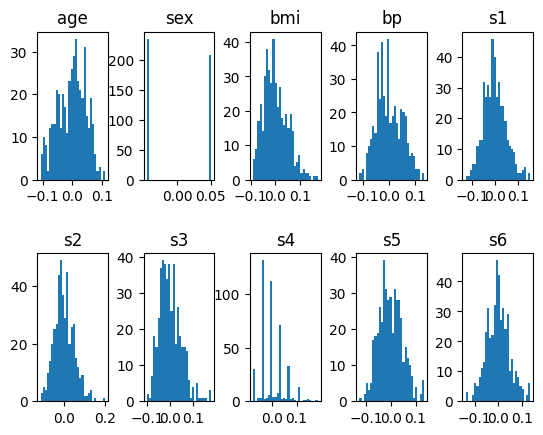

In [519]:
for i in range(diabetes.data.shape[1]):
    plt.subplot(2,5, count)
    plt.hist(diabetes.data[:, i], bins=30)
    plt.title(diabetes.feature_names[i])
    count+=1

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # サブプロット間の間隔を調整
fig.tight_layout(pad=0.4)
plt.show()

In [520]:
X = diabetes.data[:, np.newaxis, 2]
# X = diabetes.data[:, 2:3]

### X = diabetes.data[:, np.newaxis, 2]:
- このコードは、データセットから3番目の特徴量（インデックスは2）を取り出し、それを X に割り当てています。
- np.newaxis は、選択されたデータに新しい次元を追加します。
    - これにより、単一の特徴量を持つデータが2次元配列として形成されます（例えば、(442,)から(442, 1)へ変換されます）。
- これは、scikit-learnの多くのモデルが特徴量の配列として2次元配列を期待するために必要です。
### X = diabetes.data[:, 2:3]:
- このコードも同じ特徴量（BMI）を選択していますが、np.newaxis を使用する代わりにスライスを使っています。
- 2:3 はインデックス2から3未満までの要素を取り出し（実際にはインデックス2のみ）、結果として2次元配列を作成します。
- こちらも結果は X に割り当てられます。


In [521]:
y = diabetes.target

In [522]:
print('Dimension of the feature matrix', X.shape)

Dimension of the feature matrix (442, 1)


In [523]:
print('Dimension of the target value', y.shape)

Dimension of the target value (442,)


In [524]:
def naive_split_data(X, y, split_index):
    X_train = X[:-split_index]
    X_test = X[-split_index:]
    y_train = y[:-split_index]
    y_test = y[-split_index:]
    return X_train, X_test, y_train, y_test

- 引数:
    - X: 特徴データ
    - y: ターゲットデータ（目的変数）
    - split_index: どのインデックスでデータを分割するか
- 処理内容:
    - X と y はそれぞれ指定されたインデックスで訓練データとテストデータに分割されます。
- 戻り値:
    - 訓練データおよびテストデータの組 (X_train, X_test, y_train, y_test)

In [525]:
def split_data(data, target, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data[train_indices,:], data[test_indices,:], target[train_indices], target[test_indices]

- 引数
    - data: 特徴データ
    - target: ターゲットデータ
    - test_ratio: テストデータの比率 (0から1の間の実数)
- 処理内容:
    - データをランダムにシャッフルします。
    - シャッフルしたデータを指定された比率で訓練データとテストデータに分割します。
- 戻り値:
    - 訓練データおよびテストデータの組

In [526]:
# X_train, X_test, y_train, y_test = naive_split_data(X, y, 8)

- 44番目のインデックスでデータを分割しています。

In [527]:
# print('Naive Split')
# print('X train', X_train.shape)
# print('X test',X_test.shape)
# print('y train',y_train.shape)
# print('y test',y_test.shape)

In [528]:
X_train, X_test, y_train, y_test = split_data(X,y,0.1)

- 全データの10%をテストデータとしてランダムに選び、残りの90%を訓練データとしています。

In [529]:
print('Less Naive Split')
#check the resultant sizes
print('X train', X_train.shape)
print('X test',X_test.shape)
print('y train',y_train.shape)
print('y test',y_test.shape)

Less Naive Split
X train (398, 1)
X test (44, 1)
y train (398,)
y test (44,)


In [530]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [531]:
regr.fit(X_train, y_train)

LinearRegression()

In [532]:
print('Coefficients: \n', regr.coef_) # 係数
print('Intercept: \n', regr.intercept_) #　切片（数学）

Coefficients: 
 [962.70632535]
Intercept: 
 151.29217156650898


In [533]:
y_pred = regr.predict(X_test)

In [534]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 4098.33
Variance score: 0.35


### Mean squared error : 平均二乗誤差（Mean Squared Error, MSE）
これは予測値と実際の値との差（誤差）を二乗したものの平均を表します。MSEは、モデルの予測がどれだけ実際のデータポイントから離れているかを数値化します。値が低いほど、モデルの予測が実際のデータに近いことを意味し、良いモデルの指標とされます。

### Variance score : 決定係数（R²スコアまたはR-squared）
これは回帰モデルがデータのバリエーションをどれだけ説明できているかを測る指標で、0から1の間の値を取ります。1に近いほどモデルがデータによくフィットしていることを意味し、0に近いほどフィットしていないことを意味します。R²スコアは、モデルがデータの全バリエーションに対して、どれだけの割合を説明しているかを示します。

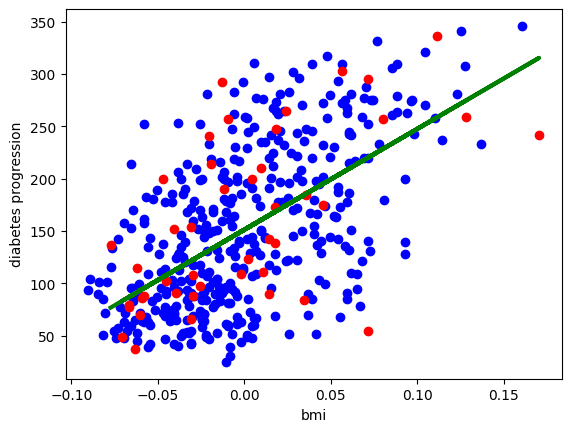

In [535]:
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='green', linewidth=3)
plt.xlabel('bmi')
plt.ylabel('diabetes progression')
plt.show()

In [536]:
mse=[]
r2=[]
train_num=[]

In [537]:
for num in range(1,442):
    train_num.append(num)

In [538]:
for num in range(1,442):
    X_train = X[:-(442-num)]
    X_test = X[-30:]
    y_train = diabetes.target[:-(442-num)]
    y_test = diabetes.target[-30:]

    #Fit (train) the model 
    regr.fit(X_train, y_train)

    #Make predictions
    y_pred = regr.predict(X_test)
    
    #Evaluate the performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))

441
441


<function matplotlib.pyplot.show(close=None, block=None)>

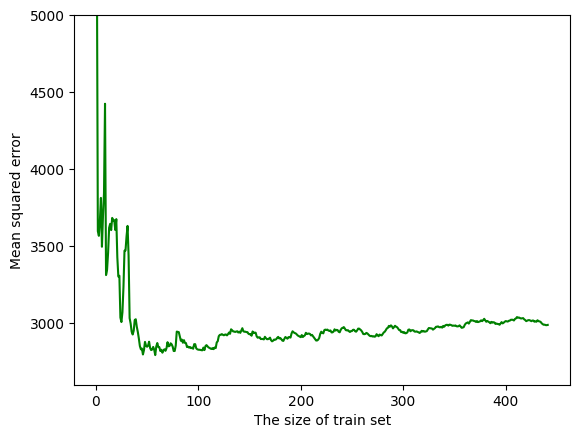

In [539]:
print(len(train_num))
print(len(mse))

plt.plot(train_num,mse,color='green')
plt.xlabel('The size of train set')
plt.ylabel('Mean squared error')
plt.ylim(2600,5000)
plt.show

In [540]:
mse=[]
r2=[]
var_num=[]

In [541]:
for num in range(0,10):
    X=diabetes.data
    if num == 0:
        X=X[:,2:3]
    elif num == 1:
        X=np.hstack((X[:,0:num],X[:,num+1:3]))
    else:
        X=X[:,:num+1]
        
    # Splitting the data matrix
    X_train = X[:-30]
    X_test = X[-30:]
    y_train = diabetes.target[:-30]
    y_test = diabetes.target[-30:]
    #Fit (train) the model
    regr.fit(X_train, y_train)
    #Make predictions
    y_pred = regr.predict(X_test)
    #Evaluate the performance
    
    from sklearn.metrics import mean_squared_error, r2_score

    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))

In [542]:
for num in range(1,11):
    var_num.append(num)
    
print("var_numに格納されている値：" + var_num)
print("var_numの要素数：" + len(var_num))
print("mseに格納されている値：" + mse)
print("mseの要素数：" + len(mse))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10
[3035.060115291269, 2960.902005332537, 2976.6206359071775, 2522.233055190825, 2530.673295310557, 2517.366460156781, 1986.7298734728877, 1977.3532789262413, 1792.6465036551547, 1826.4841712795037]
10


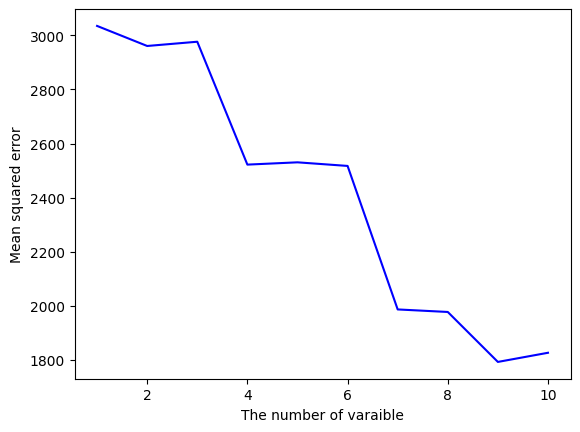

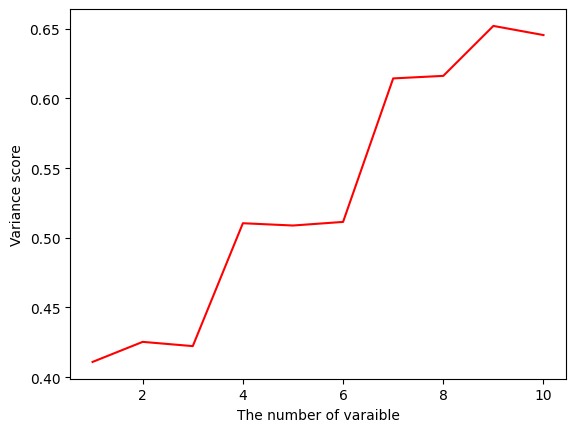

In [556]:
# プログラム実行時の注意点
# 下記のプロットは，var_num, mseの要素数が一致していないと出力できないから，毎回初期化してプログラムを実行する必要がある
# そうしないと，前回実行した結果を保存した状態になってしまう．

# mse=[]
# r2=[]
# train_num=[]

# 上記の初期化を忘れないように！！！

plt.plot(var_num,mse,color='blue')
plt.xlabel('The number of varaible')
plt.ylabel('Mean squared error')
plt.show()

plt.plot(var_num,r2,color='red')
plt.xlabel('The number of varaible')
plt.ylabel('Variance score')
plt.show()

## Variancr score

In [545]:
# # step1 データセットを訓練データとテストデータに分割するコードを作成

# from sklearn.model_selection import train_test_split

In [546]:
# X = diabetes.data   # 特徴量
# y = diabetes.target # ターゲット変数

In [547]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### test_size
- テストデータの数は、データを分割する際に `train_test_split` 関数に設定された `test_size` パラメータによって決定されます。
- `test_size` は 0.2 に設定されていました。
    - これは、利用可能なデータセットの20%をテストセットとして使用することを意味します。

### random_state
- `train_test_split` 関数の `random_state` パラメータは、分割時のデータのシャッフルを制御するために使われます。このパラメータに特定の整数値を設定することで、関数の呼び出し結果の再現性を保証することができます。

- 具体的には、`random_state` に同じ値を設定すると、関数を複数回実行しても、毎回同じ方法でデータがシャッフルされ、同じトレーニングセットとテストセットが生成されます。これにより、異なる実験やモデルトレーニングで一貫した結果を得ることが可能になり、実験の比較が公平になります。

- `random_state` を設定しない場合、`train_test_split` は毎回異なるランダムシードを使用してデータをシャッフルするため、結果の再現性は保証されません。

- `random_state=42` と設定することは、機械学習のコミュニティで一般的な慣習であり、特に理由がない限り42という数字を使うことがよくあります。これは、ランダムシードとして特に何か優れているわけではなく、単に「宇宙と人生の究極の疑問の答え」として知られる数字（ダグラス・アダムスの『銀河ヒッチハイク・ガイド』におけるジョーク）を使っているだけです。

In [548]:
# (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [549]:
# X_train_subset = X_train[:20, :1]
# y_train_subset = y_train[:20]

In [550]:
# regr.fit(X_train_subset, y_train_subset)

In [551]:
# X_test_subset = X_test[:, :1]
# test_score = regr.score(X_test_subset, y_test)

In [552]:
# test_score

In [553]:
# # 訓練データセットのサイズを段階的に増やしながらモデルのパフォーマンスを記録する
# train_sizes = np.linspace(1, X_train.shape[0], 20).astype(int)  # 訓練データのサイズの配列
# test_scores = []  # テストスコアを記録するリスト

In [554]:
# ## 訓練データのサイズごとにモデルをトレーニングし、テストスコアを記録
# for size in train_sizes:
#     # 訓練データのサブセット
#     X_train_subset = X_train[:size, :1]  # 特徴量の選択
#                                            # bmiを選択する場合は, [:size, 2:3]と記述する
#     y_train_subset = y_train[:size]
    
#     # モデルをトレーニング
#     regr.fit(X_train_subset, y_train_subset)
    
#     # テストスコアを計算してリストに追加
#     test_scores.append(regr.score(X_test_subset, y_test))

# # 訓練データのサイズと対応するテストスコア
# train_sizes, test_scores

In [555]:
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, test_scores, marker='o', linestyle='-', color='green')